In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("data/imdb_box_merge.csv")

# 1. numbers and revenue

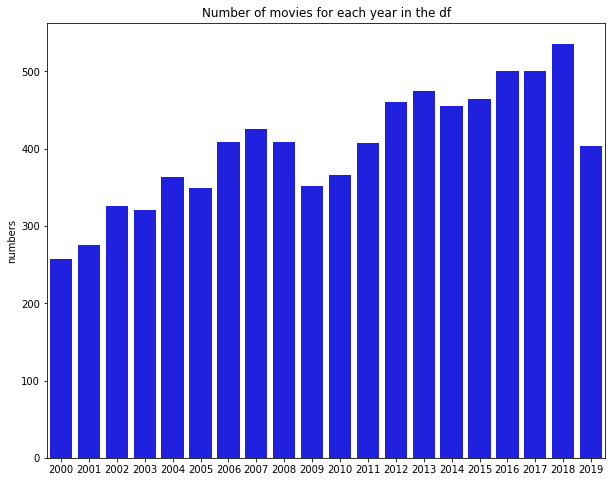

In [111]:
# number of movies per year
num_movies_year = df["year"].value_counts().to_frame().sort_index(axis = 0)
num_movies_year.columns = ["numbers"]



fig = plt.figure(figsize=(10,8));
sns.barplot(data=num_movies_year
             , y="numbers"
             , x=num_movies_year.index
             , color = "blue");
plt.title("Number of movies for each year in the df");

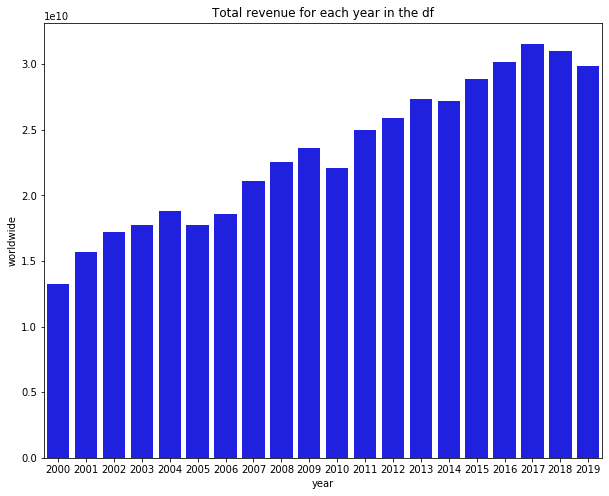

In [113]:
# total revenue per year

total_revenue_year = df[["year","worldwide"]].groupby(by = "year").sum()


fig = plt.figure(figsize=(10,8));
sns.barplot(data=total_revenue_year
             , y="worldwide"
             , x=total_revenue_year.index
             , color = "blue");
plt.title("Total revenue for each year in the df");


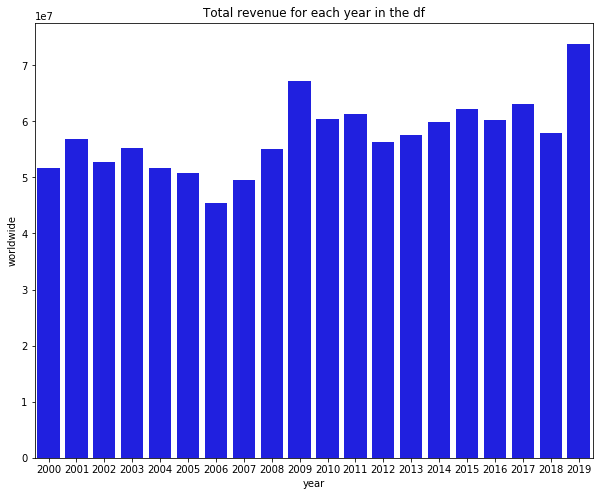

In [115]:
relative_revenue_year = df[["year","worldwide"]].groupby(by = "year").mean()


fig = plt.figure(figsize=(10,8));
sns.barplot(data=relative_revenue_year 
             , y="worldwide"
             , x=relative_revenue_year.index
             , color = "blue");
plt.title("Mean revenue for each year in the df");

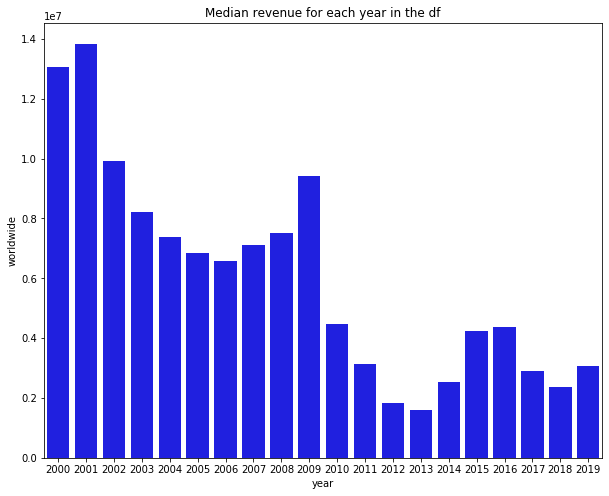

In [116]:
median_revenue_year = df[["year","worldwide"]].groupby(by = "year").median()

fig = plt.figure(figsize=(10,8));
sns.barplot(data=median_revenue_year 
             , y="worldwide"
             , x=median_revenue_year.index
             , color = "blue");
plt.title("Median revenue for each year in the df");

# 2. ratings

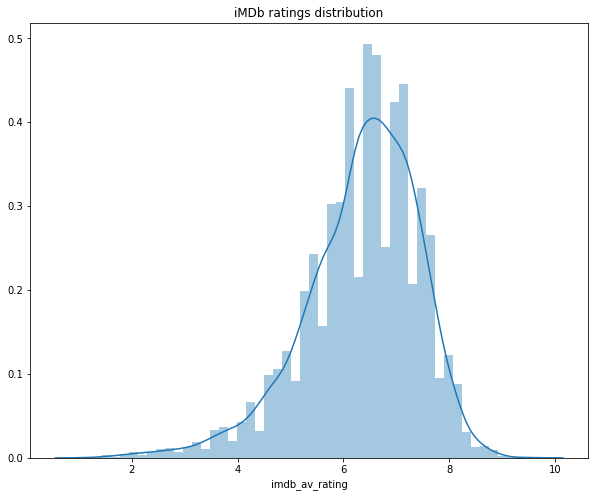

In [128]:
fig = plt.figure(figsize=(10,8));
sns.distplot(df["imdb_av_rating"][~df["imdb_av_rating"].isna()]);
plt.title("iMDb ratings distribution");


# 3. top tens

## a. top ten ratings

In [134]:
df[["title","imdb_av_rating"]].sort_values(by = "imdb_av_rating",ascending = False).head(10)

,title,imdb_av_rating
7595,"Hare Krishna! The Mantra, the Movement and the...",9.6
3428,The Twilight Zone: A 60th Anniversary Celebration,9.4
8024,Twiceland,9.1
2383,The Dark Knight,9.0
7927,BANDSTAND: The Broadway Musical on Screen,9.0
3449,Margaret Atwood: Live in Cinemas,9.0
100,The Lord of the Rings: The Return of the King,8.9
3891,Walking on Dead Fish,8.9
6738,The Unknowns,8.8
3403,Metallica & San Francisco Symphony - S&M2,8.8


## b. top ten revenue

In [136]:
df[["title","year","worldwide"]].sort_values(by = "worldwide",ascending = False).head(10)

,title,year,worldwide
6585,Avengers: Endgame,2019,2797800564
2616,Avatar,2009,2743856300
5720,Star Wars: Episode VII - The Force Awakens,2015,2068223624
6584,Avengers: Infinity War,2018,2048359754
1462,Jurassic World,2015,1670400637
7359,The Lion King,2019,1656943394
2919,The Avengers,2012,1518812988
5917,Furious 7,2015,1515047671
6737,Frozen II,2019,1405202167
5637,Avengers: Age of Ultron,2015,1402805868


In [154]:
len([])

0

# 4. inspecting genres

In [151]:
df["genres"] = df["genres"].apply(lambda x: x if x!="\\N" else "")

In [152]:
df["genres_list"] = df["genres"].apply(lambda x: x.split(","))

In [160]:
df["genre1"] = df["genres_list"].apply(lambda x: x[0] if len(x)>0 else "")
df["genre2"] = df["genres_list"].apply(lambda x: x[1] if len(x)>1 else "")
df["genre3"] = df["genres_list"].apply(lambda x: x[2] if len(x)>2 else "")
df.drop(columns = ["genres","genres_list"],inplace=True)

In [262]:
genres = []
for i in range(2):
    genres += list(df[f"genre{i+1}"].value_counts().index)
    
genres = list(set(genres))

genres_count = pd.DataFrame(index = genres)
genres_count["count"] = 0

for i in range(2):
    counts = df[f"genre{i+1}"].value_counts()
    for ind, count in counts.to_dict().items():
        genres_count.loc[ind,"count"] = genres_count.loc[ind,"count"] + count
        

genres_count = genres_count.transpose().drop(columns = [""]).transpose()

count    14458
dtype: int64